In [157]:
import pandas as pd
import numpy as np

In [158]:
df = pd.read_csv('raw_data/LAMDA_genes/LAMDA_Signature_Human.csv')
df = df[(df['Color']=='Enriched in NeuN FDR < 0.01') | (df['Color']=='Enriched in pSyn FDR < 0.01') | (df['Color']=='Enriched in NeuN FDR < 0.05') | (df['Color']=='Enriched in pSyn FDR < 0.05')]

<AxesSubplot:xlabel='Color'>

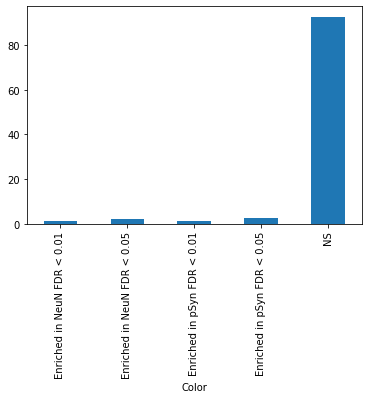

In [160]:
net = pd.read_csv('processed_data/03-LR_network_visualisation/louvain_largest_cluster_0.4.csv', sep = ',', index_col = 0)
net = net.merge(df, left_on = '0', right_on = 'Feature', how = 'left')
net['Color'] = net['Color'].replace(np.nan, 'NS')
net['counts'] = 1
net.groupby('Color').sum()["counts"]
counts = net.groupby('Color').sum()['counts']
norm = (counts/counts.sum()*100)
norm.plot.bar()

In [161]:
norm

Color
Enriched in NeuN FDR < 0.01     1.387283
Enriched in NeuN FDR < 0.05     2.080925
Enriched in pSyn FDR < 0.01     1.387283
Enriched in pSyn FDR < 0.05     2.427746
NS                             92.716763
Name: counts, dtype: float64

In [162]:
net[net['Color']!='NS']

,0,Unnamed: 0,Feature,Comparison,Estimate,P,FDR,Gene,Color,invert_P,counts
1,NRG1,3044.0,NRG1,NeuN vs pSyn,0.536692,0.000277,0.004106,NRG1,Enriched in pSyn FDR < 0.01,3.557714,1
22,MFGE8,7621.0,MFGE8,NeuN vs pSyn,0.770833,0.006314,0.033536,MFGE8,Enriched in pSyn FDR < 0.05,2.199668,1
41,FAM3C,748.0,FAM3C,NeuN vs pSyn,-1.017047,0.004955,0.028737,FAM3C,Enriched in NeuN FDR < 0.05,-2.304961,1
46,SCARB1,3373.0,SCARB1,NeuN vs pSyn,0.745332,0.009217,0.042583,SCARB1,Enriched in pSyn FDR < 0.05,2.035404,1
78,CNTN1,7852.0,CNTN1,NeuN vs pSyn,-0.722287,0.000002,0.000151,CNTN1,Enriched in NeuN FDR < 0.01,-5.631156,1
...,...,...,...,...,...,...,...,...,...,...,...
840,NRXN3,1056.0,NRXN3,NeuN vs pSyn,0.566038,0.000143,0.002595,NRXN3,Enriched in pSyn FDR < 0.01,3.844709,1
843,SEMA3E,4080.0,SEMA3E,NeuN vs pSyn,0.838468,0.003117,0.021286,SEMA3E,Enriched in pSyn FDR < 0.05,2.506282,1
846,FGF12,2917.0,FGF12,NeuN vs pSyn,-0.757175,0.009780,0.043949,FGF12,Enriched in NeuN FDR < 0.05,-2.009667,1
852,GRM5,201.0,GRM5,NeuN vs pSyn,-0.684534,0.003197,0.021599,GRM5,Enriched in NeuN FDR < 0.05,-2.495279,1


AD                         6.0
ALS                        2.0
AnorexiaNervosa            1.0
BipolarDisorder            3.0
BrainAneurysm              1.0
EssentialTremor            0.0
FrontotemporalDementia     0.0
MajorDepressiveDisorder    2.0
MigraineDisorder           1.0
MS                         1.0
NeuroticDisorder           1.0
OCD                        0.0
PartialEpilepsy            4.0
PD                         5.0
RestlessLeg                1.0
Schizophrenia              6.0
TouretteSyndrome           0.0
UnipolarDepression         3.0
dtype: float64

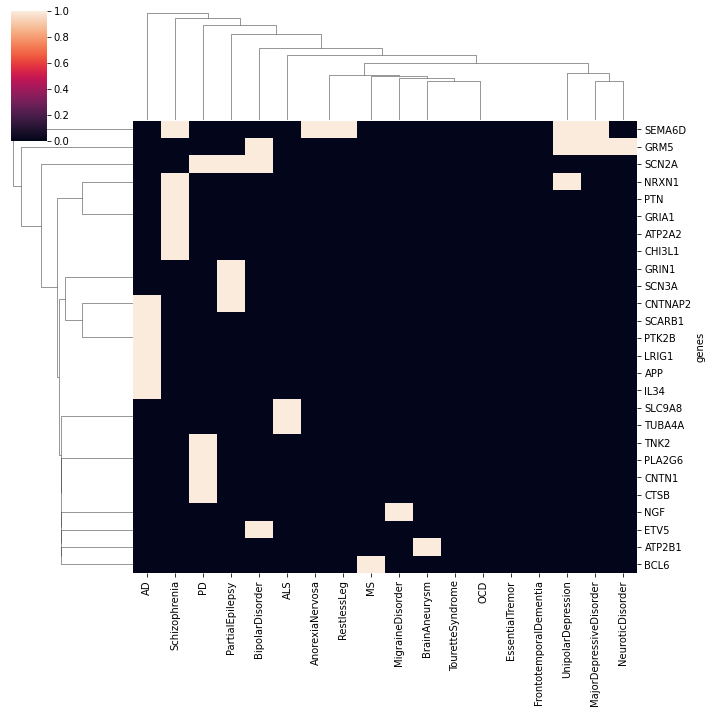

In [163]:
dis = pd.read_csv('/Users/melis/Documents/GitHub/LR_project/processed_data/hot-encoded-diseases_0.400000.csv', index_col = 0)

sns.clustermap(dis[dis.index.isin(list(net[net['Color']!='NS']['0']))])
#plt.show()
dis[dis.index.isin(list(net[net['Color']!='NS']['0']))].sum(axis = 0)

<AxesSubplot:xlabel='Color'>

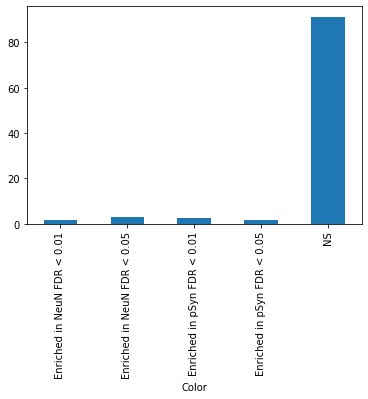

In [164]:
net = pd.read_csv('processed_data/03-LR_network_visualisation/louvain_largest_cluster_0.7.csv', sep = ',', index_col = 0)
net = net.merge(df, left_on = '0', right_on = 'Feature', how = 'left')
net['Color'] = net['Color'].replace(np.nan, 'NS')
net['counts'] = 1
net.groupby('Color').sum()["counts"]
counts = net.groupby('Color').sum()['counts']
norm = (counts/counts.sum()*100)
norm.plot.bar()

In [165]:
norm

Color
Enriched in NeuN FDR < 0.01     1.56250
Enriched in NeuN FDR < 0.05     3.12500
Enriched in pSyn FDR < 0.01     2.34375
Enriched in pSyn FDR < 0.05     1.56250
NS                             91.40625
Name: counts, dtype: float64

In [166]:
net[net['Color']!='NS']['0']

4      TUBA4A
5       ITGB4
21     SCARB1
25      GRIA1
50     PLA2G6
70      HSPA4
72      SCN2A
97      ITGB1
101     ITGAV
102       APP
110     FGF12
Name: 0, dtype: object

AD                    1.0
ALS                   1.0
BipolarDisorder       1.0
MigraineDisorder      0.0
PartialEpilepsy       1.0
PD                    1.0
Schizophrenia         1.0
UnipolarDepression    0.0
dtype: float64

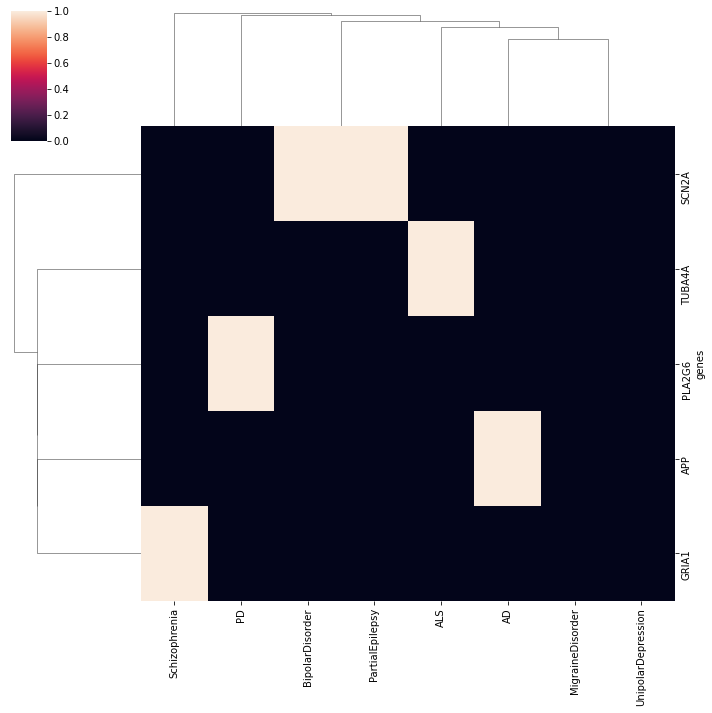

In [167]:
dis = pd.read_csv('/Users/melis/Documents/GitHub/LR_project/processed_data/hot-encoded-diseases_0.700000.csv', index_col = 0)

sns.clustermap(dis[dis.index.isin(list(net[net['Color']!='NS']['0']))])
#plt.show()
dis[dis.index.isin(list(net[net['Color']!='NS']['0']))].sum(axis = 0)

In [168]:
dis[dis.index.isin(list(net[net['Color']!='NS']['0']))].sum(axis = 0)

AD                    1.0
ALS                   1.0
BipolarDisorder       1.0
MigraineDisorder      0.0
PartialEpilepsy       1.0
PD                    1.0
Schizophrenia         1.0
UnipolarDepression    0.0
dtype: float64